In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Task 1

In [ ]:
%ls
file_path = 'emails.csv'
#data = pd.read_csv(file_path, on_bad_lines='skip')
data = pd.read_csv(file_path)
print(data)

cleaned_car_data.json  emails.csv  sample_data/
       Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  \
0        Email 1    0   0    1    0    0   0    2    0    0  ...         0   
1        Email 2    8  13   24    6    6   2  102    1   27  ...         0   
2        Email 3    0   0    1    0    0   0    8    0    0  ...         0   
3        Email 4    0   5   22    0    5   1   51    2   10  ...         0   
4        Email 5    7   6   17    1    5   2   57    0    9  ...         0   
...          ...  ...  ..  ...  ...  ...  ..  ...  ...  ...  ...       ...   
5167  Email 5168    2   2    2    3    0   0   32    0    0  ...         0   
5168  Email 5169   35  27   11    2    6   5  151    4    3  ...         0   
5169  Email 5170    0   0    1    1    0   0   11    0    0  ...         0   
5170  Email 5171    2   7    1    0    2   1   28    2    0  ...         0   
5171  Email 5172   22  24    5    1    6   5  148    8    2  ...         0   

      jay  valu

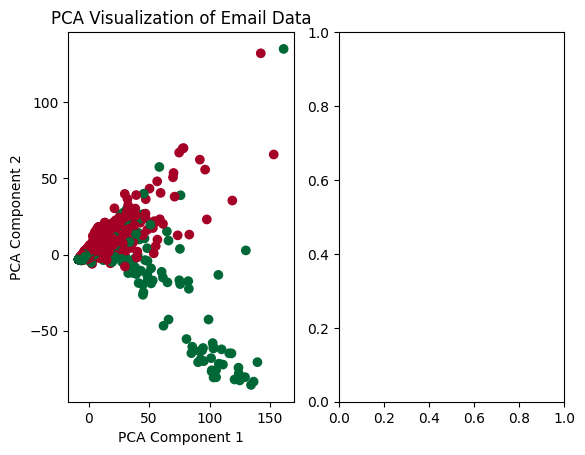

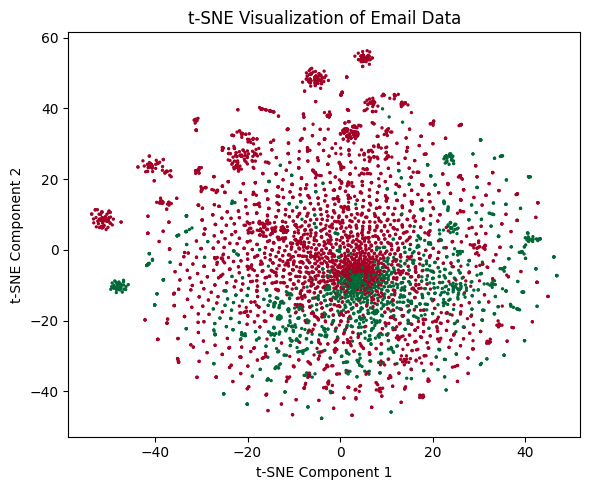

In [ ]:
X = data.drop(['Email No.', 'Prediction'], axis=1)
y = data['Prediction']

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

tsne = TSNE(n_components=2, perplexity=100, random_state=42)
X_tsne = tsne.fit_transform(X_std)

plt.subplot(1, 2, 1)
plt.sc8atter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='RdYlGn')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Email Data')

plt.subplot(1, 2, 2)
plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='RdYlGn', s=2)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Email Data')

plt.tight_layout()
plt.show()

In [ ]:
X = data.drop(['Email No.', 'Prediction'], axis=1)
y = data['Prediction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)

svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
y_pred_kmeans = kmeans.predict(X_test)
y_pred_svm = svm.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
                    
print('Accuracy (RandomForest):', accuracy_rf)
print('Accuracy (K-Means):', accuracy_kmeans)
print('Accuracy (SVM):', accuracy_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy (RandomForest): 0.9777777777777777
Accuracy (K-Means): 0.7091787439613526
Accuracy (SVM): 0.9594202898550724


#Task 2

In [ ]:
file_path = 'cleaned_car_data.json'
data = pd.read_json(file_path)
print(data)

     symboling  doornumber  wheelbase  carlength  carwidth  carheight  \
0            3           2       88.6      168.8      64.1       48.8   
1            3           2       88.6      168.8      64.1       48.8   
2            1           2       94.5      171.2      65.5       52.4   
3            2           4       99.8      176.6      66.2       54.3   
4            2           4       99.4      176.6      66.4       54.3   
..         ...         ...        ...        ...       ...        ...   
200         -1           4      109.1      188.8      68.9       55.5   
201         -1           4      109.1      188.8      68.8       55.5   
202         -1           4      109.1      188.8      68.9       55.5   
203         -1           4      109.1      188.8      68.9       55.5   
204         -1           4      109.1      188.8      68.9       55.5   

     curbweight  cylindernumber  enginesize  boreratio  ...  enginetype_rotor  \
0          2548               4         13

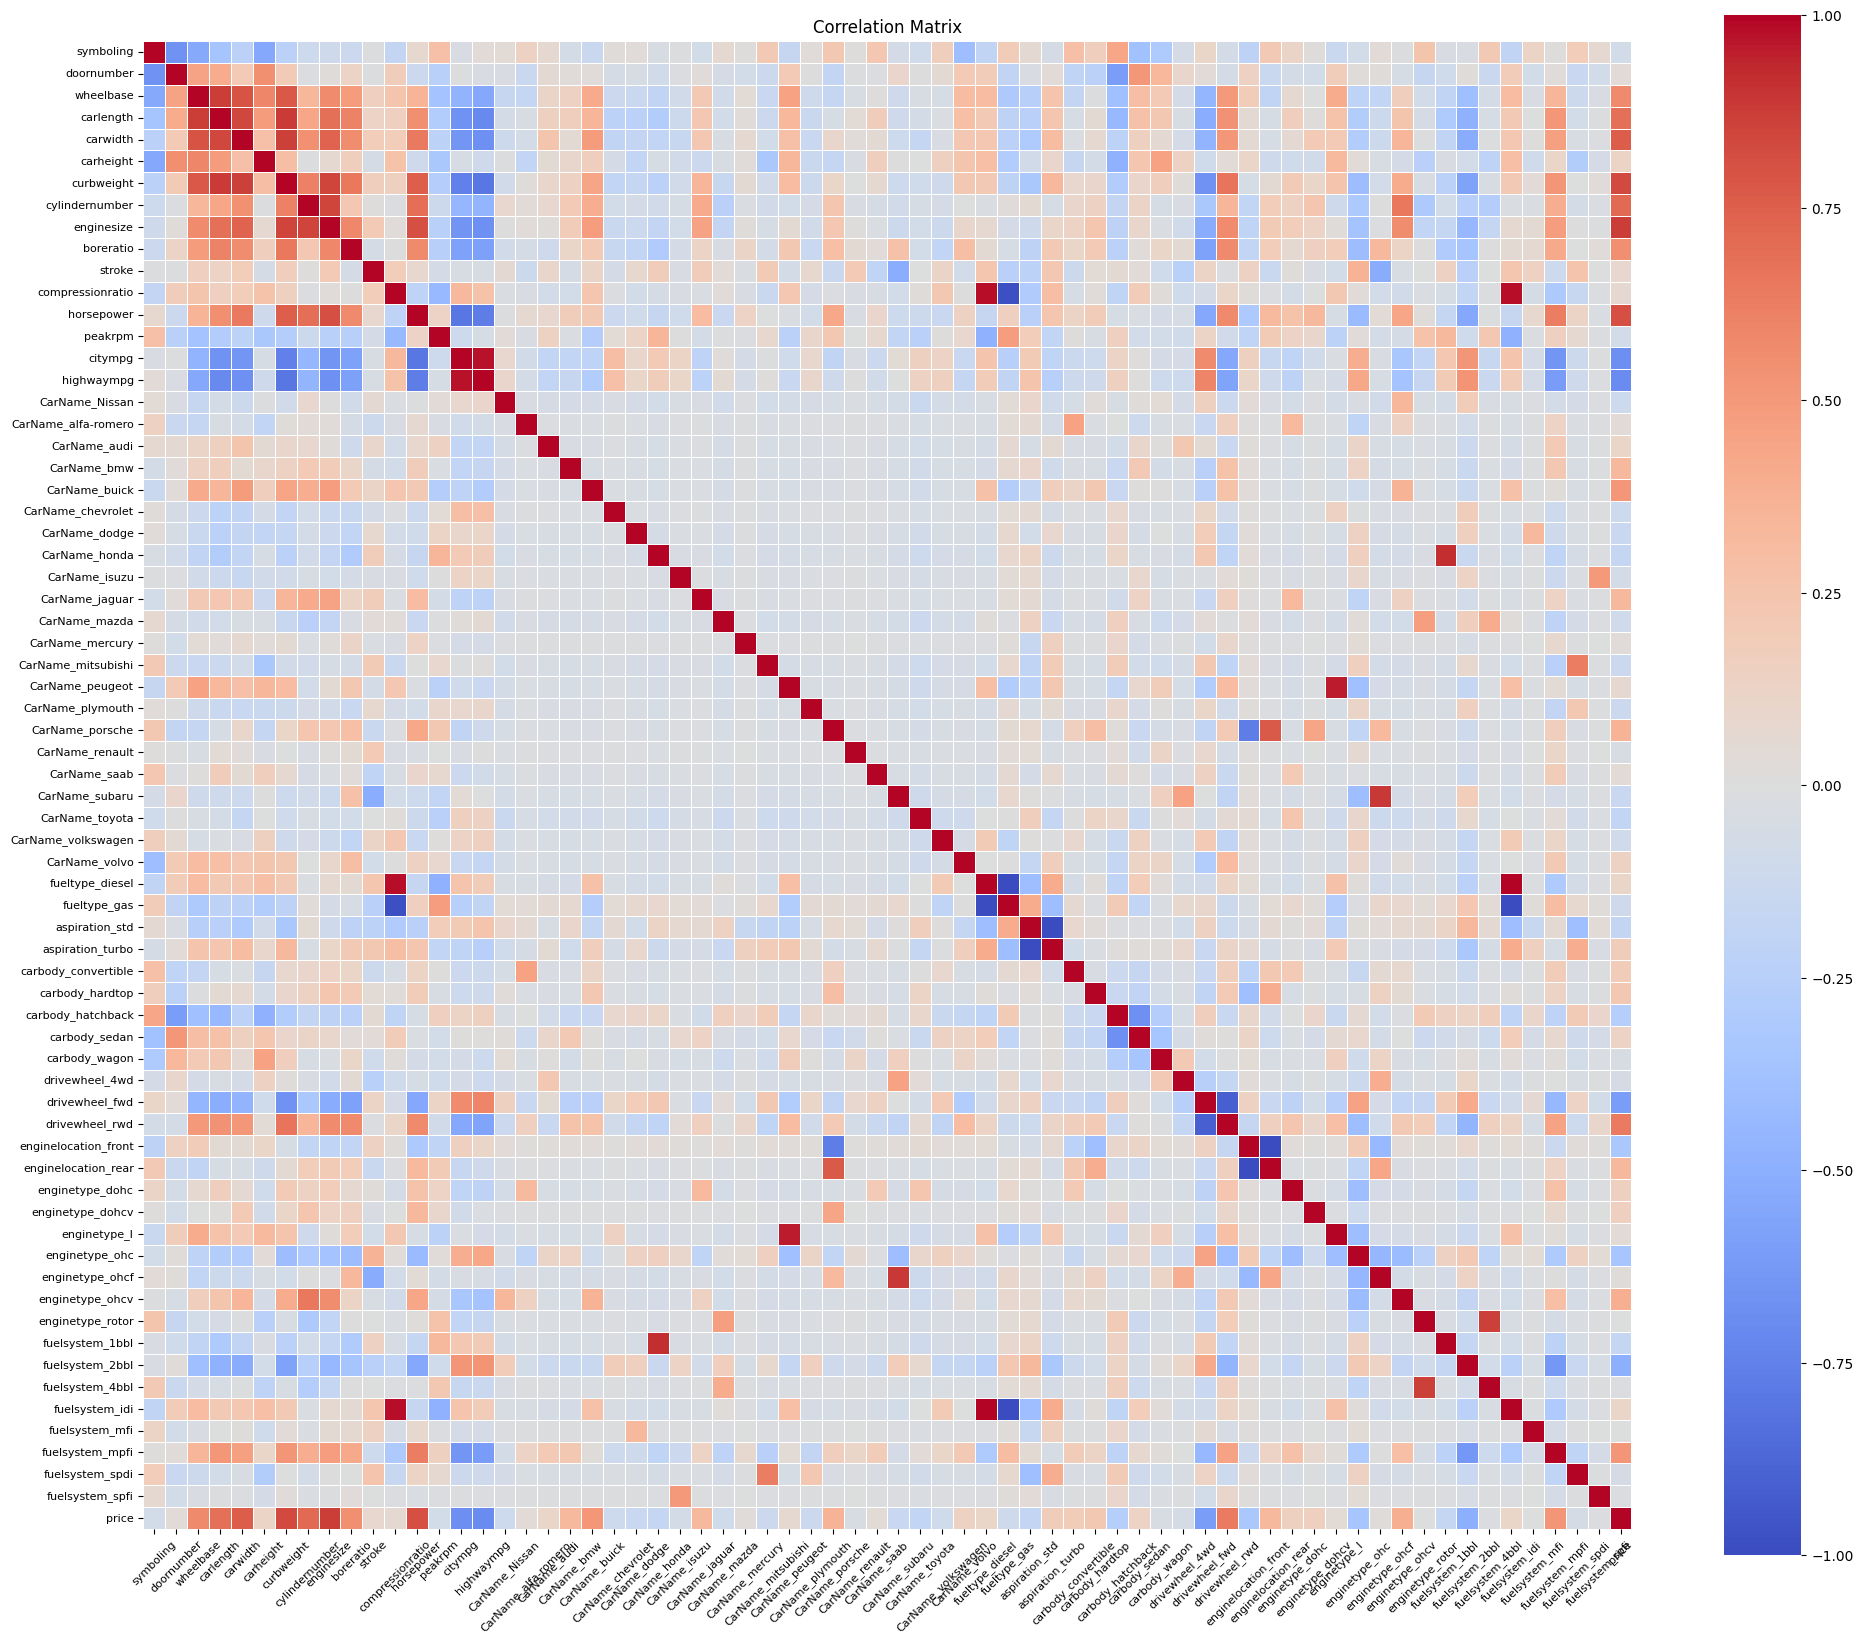

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', square=True, linewidth=0.5)
plt.title('Correlation Matrix')
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.show()

In [ ]:
features = data.drop('price', axis=1)
target = data['price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)
linear_predictions = linear_model.predict(X_test)
ridge_predictions = ridge_model.predict(X_test)
lasso_predictions = lasso_model.predict(X_test)

knn_mse = mean_squared_error(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

linear_mse = mean_squared_error(y_test, linear_predictions)
linear_mae = mean_absolute_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

print('k-NN Regression:')
print('MSE:', knn_mse)
print('MAE:', knn_mae)
print('R-squared:', knn_r2)

print('\nLinear Regression:')
print('MSE:', linear_mse)
print('MAE:', linear_mae)
print('R-squared:', linear_r2)

print('\nRidge Regression:')
print('MSE:', ridge_mse)
print('MAE:', ridge_mae)
print('R-squared:', ridge_r2)

print('\nLasso Regression:')
print('MSE:', lasso_mse)
print('MAE:', lasso_mae)
print('R-squared:', lasso_r2)

k-NN Regression:
MSE: 7456290.116089953
MAE: 1871.430142857143
R-squared: 0.906902081176392

Linear Regression:
MSE: 5419199.825965681
MAE: 1854.7951591218855
R-squared: 0.9323368300278491

Ridge Regression:
MSE: 4646093.552562706
MAE: 1768.4663579804426
R-squared: 0.9419896981382219

Lasso Regression:
MSE: 6053781.886900012
MAE: 1905.2871455622026
R-squared: 0.9244135507192427


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.053e+08, tolerance: 1.134e+06
  model = cd_fast.enet_coordinate_descent(
